In [158]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, transform, color
import scipy.ndimage as ndi
from skimage.filters import threshold_multiotsu
from sklearn.cluster import k_means

uint8 (563, 1000, 3)


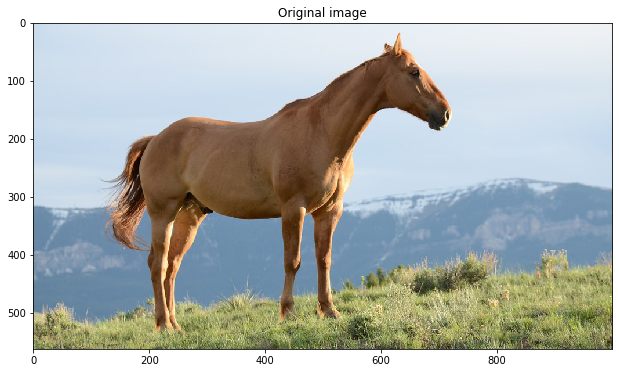

In [188]:
#img = cv2.imread('./horse1-2.jpg')
img = io.imread('./horse1-2.jpg')
print(img.dtype, img.shape)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title("Original image")
plt.savefig("original_image.png")

(188, 333, 3)


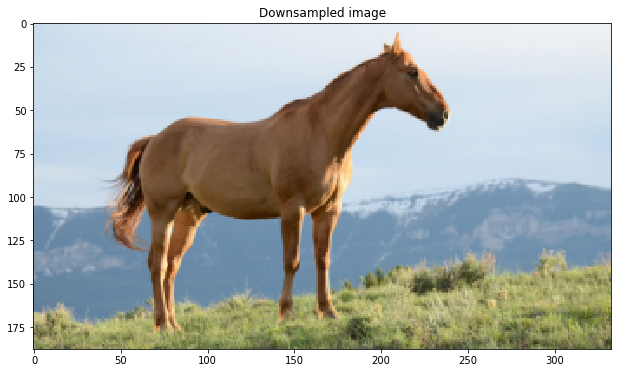

In [189]:
import warnings
warnings.filterwarnings('ignore')

img_rescaled = transform.rescale(img, 1/3)
print(img_rescaled.shape)
plt.figure(figsize=(12,6))
plt.imshow(img_rescaled)
plt.title("Downsampled image")
plt.savefig("downsampled_image.png")

(563, 1000)


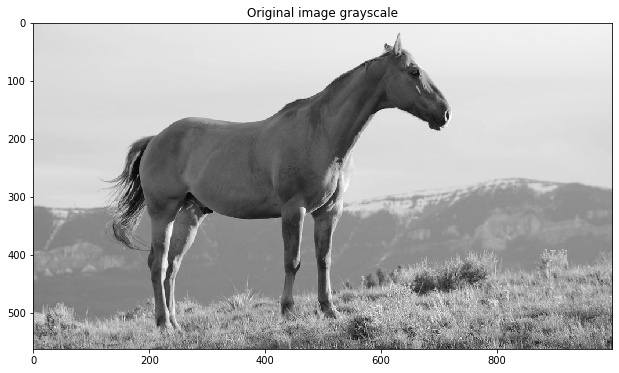

In [190]:
img_gray = color.rgb2gray(img)*255
print(img_gray.shape)
plt.figure(figsize=(12,6))
plt.imshow(img_gray, cmap='gray')
plt.title("Original image grayscale")
plt.savefig("original_image_grayscale.png")

(563, 1000)


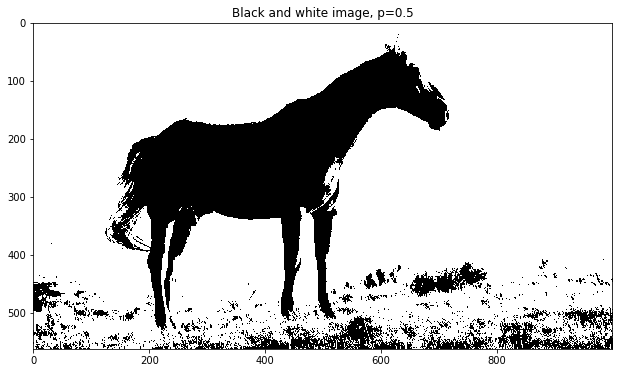

In [191]:
img_bw = np.where(img_gray > 0.5*255, 1., 0.)
print(img_bw.shape)
plt.figure(figsize=(12,6))
plt.imshow(img_bw, cmap='gray')
plt.title("Black and white image, p=0.5")
plt.savefig("bw_image.png")

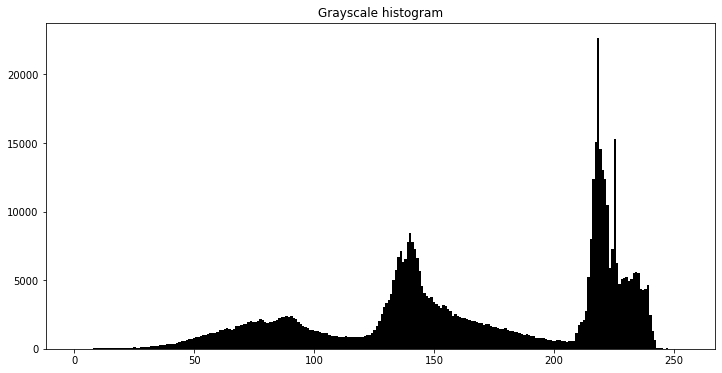

In [195]:
plt.figure(figsize=(12,6))
plt.hist(img_gray.ravel(), bins = 256, color='black')
plt.title("Grayscale histogram")
plt.savefig("grayscale_histogram.png")

In [97]:
# Transformations

# linear 
img_linear = 255 - img_gray

# log
c1 = 20
c2 = 40
img_log1 = c1 * np.log(img_gray+1)
img_log2 = c2 * np.log(img_gray+1)

# thresholding
img_bw1 = np.where(img_gray > 100, 1., 0.)
img_bw2 = np.where(img_gray > 150, 1., 0.)

# histogram shift
L = 25
U = 225
s = 50
img_shift = np.piecewise(img_gray, 
                         [img_gray > U-s, ((img_gray > L-s) & (img_gray <= U-s)), img_gray <= L-s], 
                         [U, lambda x: x + s, L])

# histogram stretch
print("original contrast: ", img_gray.max() - img_gray.min())
lam = 200
img_stretch = lam*(img_gray - img_gray.min()) / (img_gray.max() - img_gray.min())
print("new contrast: ", img_stretch.max() - img_stretch.min())

original contrast:  253.78950000000003
new contrast:  200.0


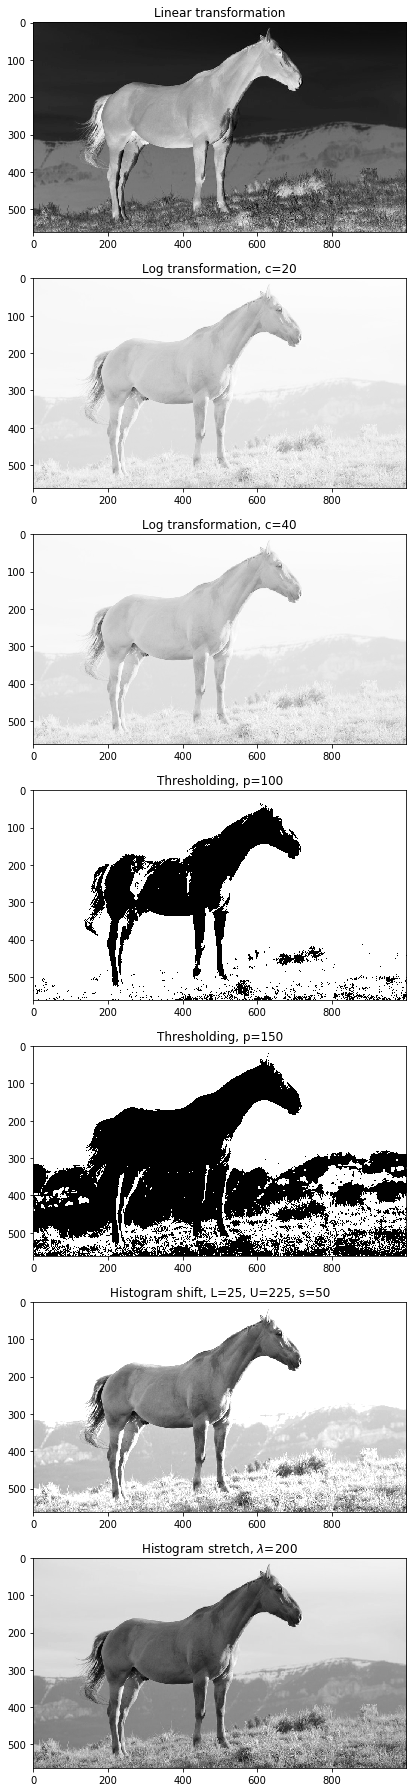

In [108]:
# plotting transformations

plt.figure(figsize=(25,25))
plt.subplot(7, 1, 1)
plt.imshow(img_linear, cmap='gray')
plt.title("Linear transformation")

plt.subplot(7, 1, 2)
plt.imshow(img_log1, cmap='gray')
plt.title("Log transformation, c=20")

plt.subplot(7, 1, 3)
plt.imshow(img_log2, cmap='gray')
plt.title("Log transformation, c=40")

plt.subplot(7, 1, 4)
plt.imshow(img_bw1, cmap='gray')
plt.title("Thresholding, p=100")

plt.subplot(7, 1, 5)
plt.imshow(img_bw2, cmap='gray')
plt.title("Thresholding, p=150")

plt.subplot(7, 1, 6)
plt.imshow(img_shift, cmap='gray')
plt.title("Histogram shift, L=25, U=225, s=50")

plt.subplot(7, 1, 7)
plt.imshow(img_stretch, cmap='gray')
plt.title("Histogram stretch, $\lambda$=200")

plt.tight_layout()

plt.savefig("transformations.png")

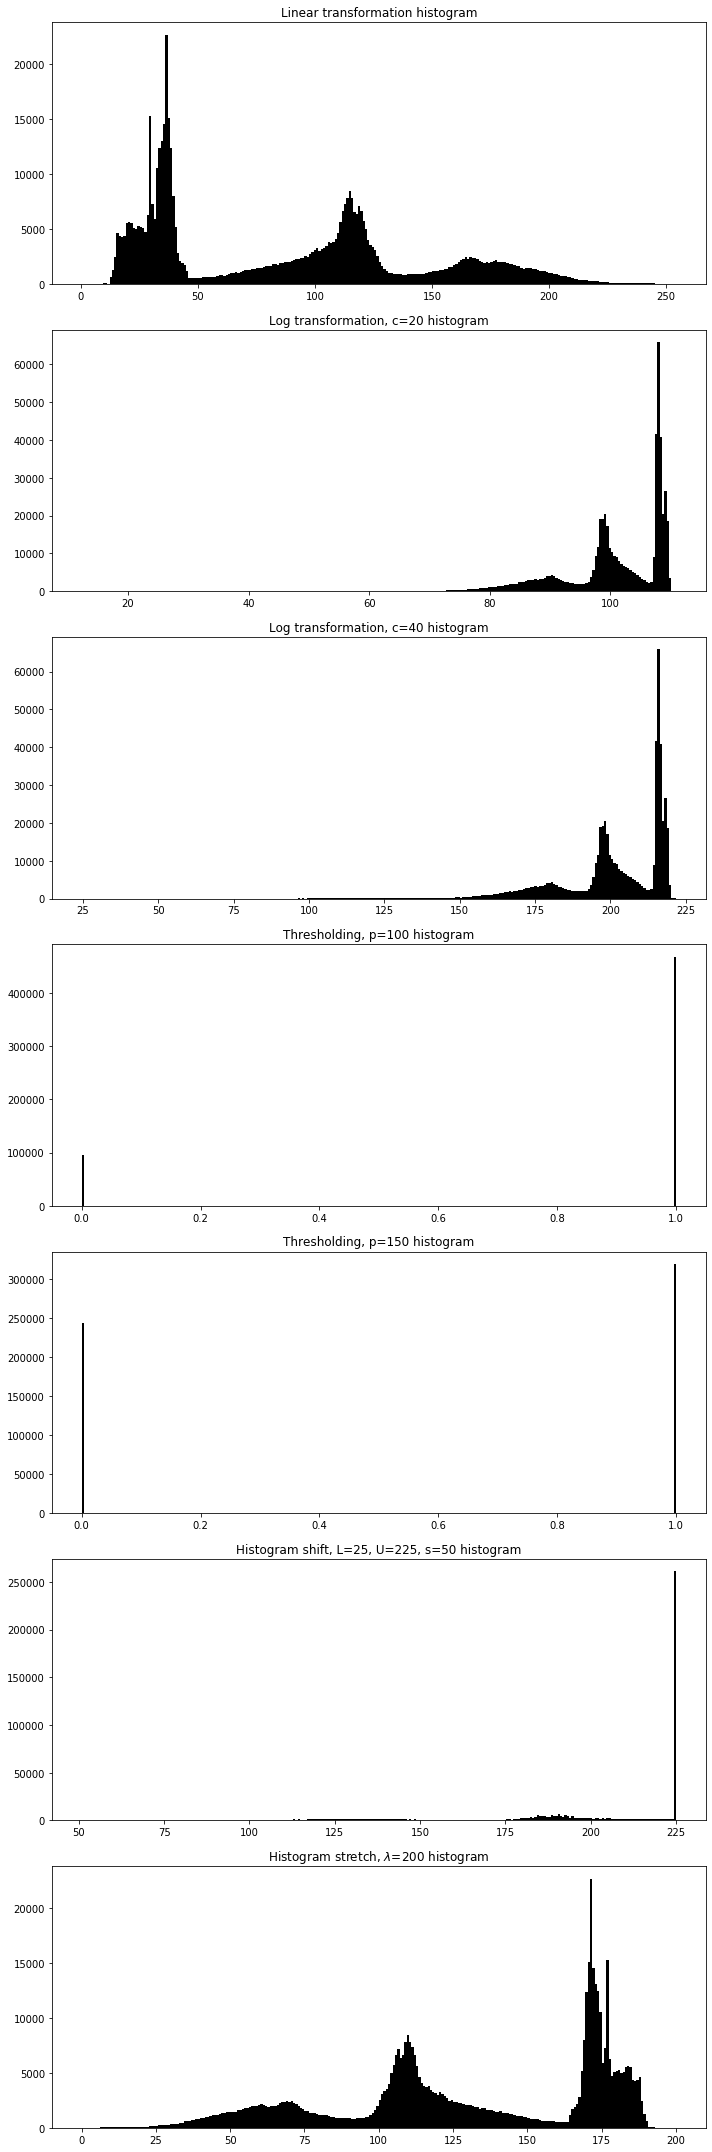

In [103]:
# plotting transformations

plt.figure(figsize=(10,30))
plt.subplot(7, 1, 1)
plt.hist(img_linear.ravel(), bins = 256, color='black')
plt.title("Linear transformation histogram")

plt.subplot(7, 1, 2)
plt.hist(img_log1.ravel(), bins = 256, color='black')
plt.title("Log transformation, c=20 histogram")

plt.subplot(7, 1, 3)
plt.hist(img_log2.ravel(), bins = 256, color='black')
plt.title("Log transformation, c=40 histogram")

plt.subplot(7, 1, 4)
plt.hist(img_bw1.ravel(), bins = 256, color='black')
plt.title("Thresholding, p=100 histogram")

plt.subplot(7, 1, 5)
plt.hist(img_bw2.ravel(), bins = 256, color='black')
plt.title("Thresholding, p=150 histogram")

plt.subplot(7, 1, 6)
plt.hist(img_shift.ravel(), bins = 256, color='black')
plt.title("Histogram shift, L=25, U=225, s=50 histogram")

plt.subplot(7, 1, 7)
plt.hist(img_stretch.ravel(), bins = 256, color='black')
plt.title("Histogram stretch, $\lambda$=200 histogram")

plt.tight_layout()
plt.savefig("transformations_histograms.png")

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


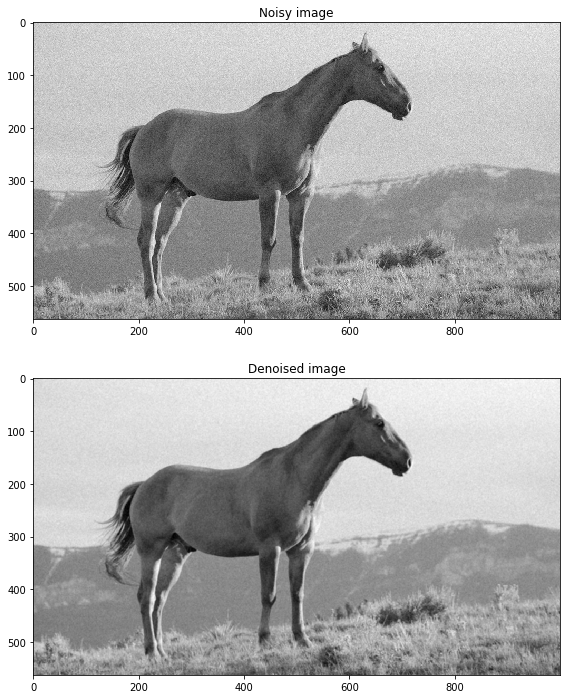

In [193]:
img_noisy = img_gray + np.random.normal(loc=0.0, scale=10., size=(img_gray.shape))
plt.figure(figsize=(24,12))
plt.subplot(2, 1, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title("Noisy image")

mask = (1/9)*np.ones(shape=(3,3))
print(mask)
img_denoised = ndi.convolve(img_noisy, mask)
plt.subplot(2, 1, 2)
plt.imshow(img_denoised, cmap='gray')
plt.title("Denoised image")

plt.savefig("denoised_image.png")

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


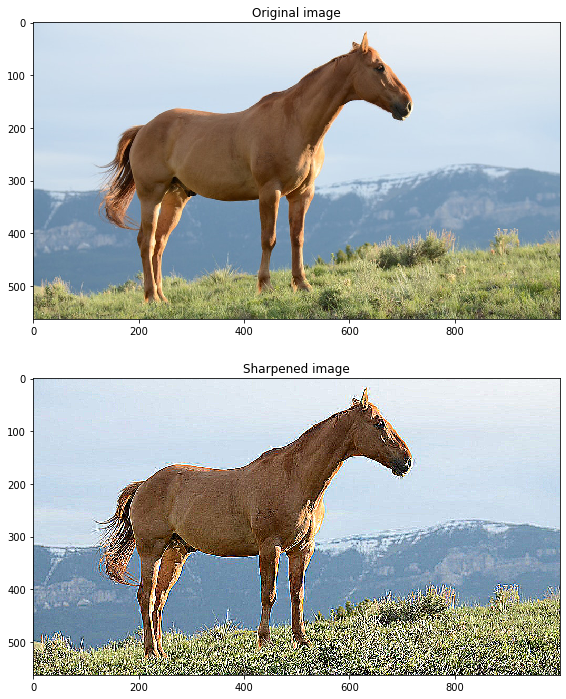

In [194]:
plt.figure(figsize=(24,12))
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.title("Original image")

mask = np.array([[-1, -1, -1],
                 [-1, 9, -1], 
                 [-1, -1, -1]])
print(mask)
'''img_sharp_r = ndi.convolve(img[:,:,0], mask)
img_sharp_g = ndi.convolve(img[:,:,1], mask)
img_sharp_b = ndi.convolve(img[:,:,2], mask)
img_sharp = np.dstack((img_sharp_r, img_sharp_g, img_sharp_b))'''
img_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=mask)
plt.subplot(2, 1, 2)
plt.imshow(img_sharp)
plt.title("Sharpened image")

plt.savefig("sharpened_image.png")

In [157]:
# Otsu's method from example code

test = threshold_otsu

I = img.ravel()
num_bins = 256
bins = np.arange(0, num_bins+1, 1, dtype=int)
hist, _ = np.histogram(I, bins=bins)

p = hist / hist.sum()
omega = np.cumsum(p)
mu = np.cumsum(p * np.arange(1, num_bins+1))
mu_t = mu[-1]

sigma_b_squared = (mu_t * omega - mu)**2 / (omega * (1 - omega))
maxval = sigma_b_squared.max()
idx = np.argmax(sigma_b_squared)

In [ ]:
# multi-Otsu

plt.figure(figsize=(16,16))
for level in range(2, 6):
    thresholds = threshold_multiotsu(img_gray, level)
    regions = np.digitize(img_gray, bins=thresholds)
    plt.subplot(4, 1, level - 1)
    plt.imshow(regions, cmap='gray')
    plt.title(f"Otsu's method segmentation, level={level}")

plt.tight_layout()
plt.savefig("otsu.png")

In [ ]:
[166.80791699]
[111.23087012 183.67952051]
[106.26863379 153.90610254 196.58133496]
[ 75.50276855 115.20065918 155.89099707 197.57378223]

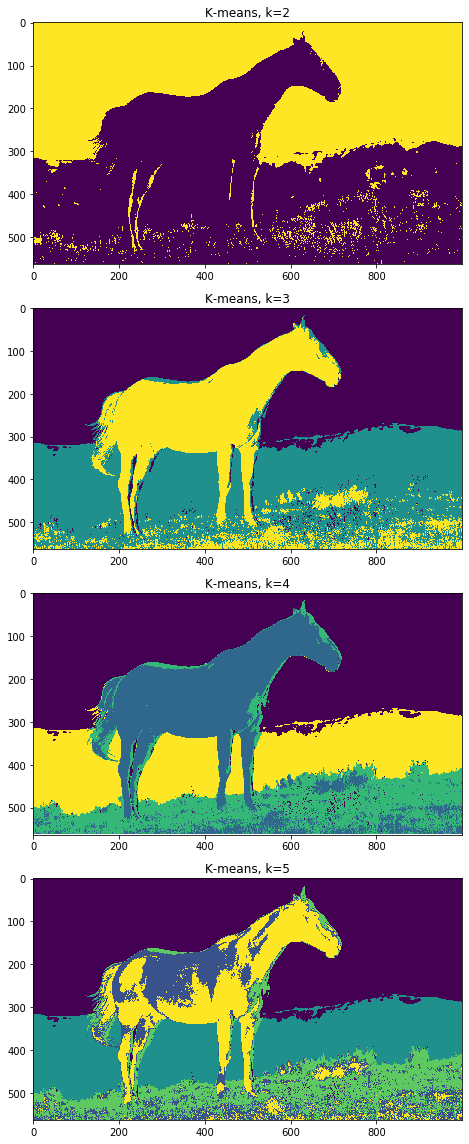

In [159]:
# k means clustering

X = img.reshape(-1,img.shape[2]).astype(float)

Ks = [2, 3, 4, 5]

plt.figure(figsize=(16,16))
for k in Ks:
    centers, L,_ = k_means(X, k)
    Y = L.reshape(*img.shape[:2])
    
    plt.subplot(4, 1, k - 1)
    plt.imshow(Y)
    plt.title(f'K-means, k={k}')
    
plt.tight_layout()
plt.savefig("kmeans.png")

7155.421988487402


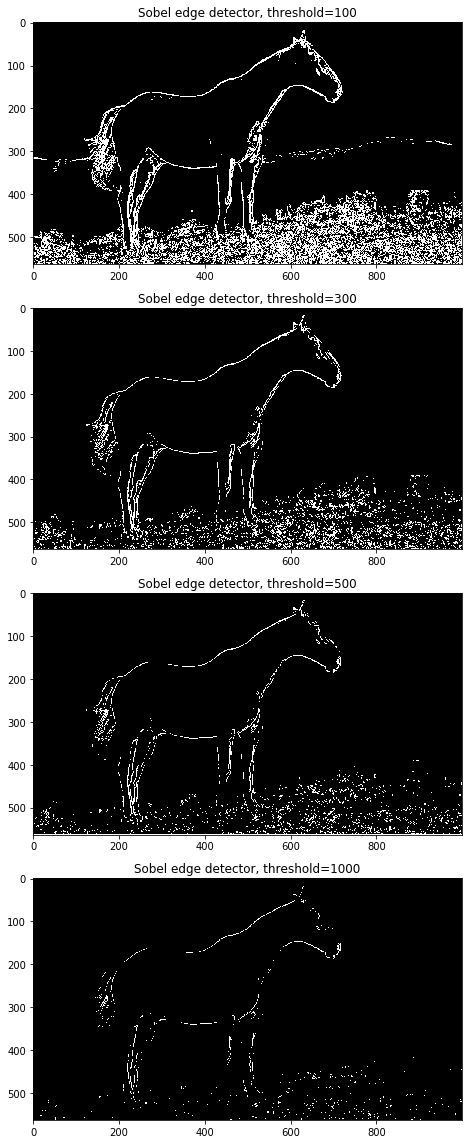

In [186]:
# Sobel edge detection 

op = np.array([[1, 2, 1],
               [ 0, 0, 0],
               [-1, -2, -1]])/10
x_mask = op.T
y_mask = op
fx = ndi.convolve(img_gray, x_mask, mode='nearest')
fy = ndi.convolve(img_gray, y_mask, mode='nearest')

f = np.square(fx) + np.square(fy)

print(f.max())

plt.figure(figsize=(16,16))
for i, t in enumerate([100, 300, 500, 1000]):
    plt.subplot(4, 1, i+1)
    plt.imshow(f > t, cmap='gray')
    plt.title(f'Sobel edge detector, threshold={t}')
    
plt.tight_layout()
plt.savefig("sobel.png")

3987.524433219701


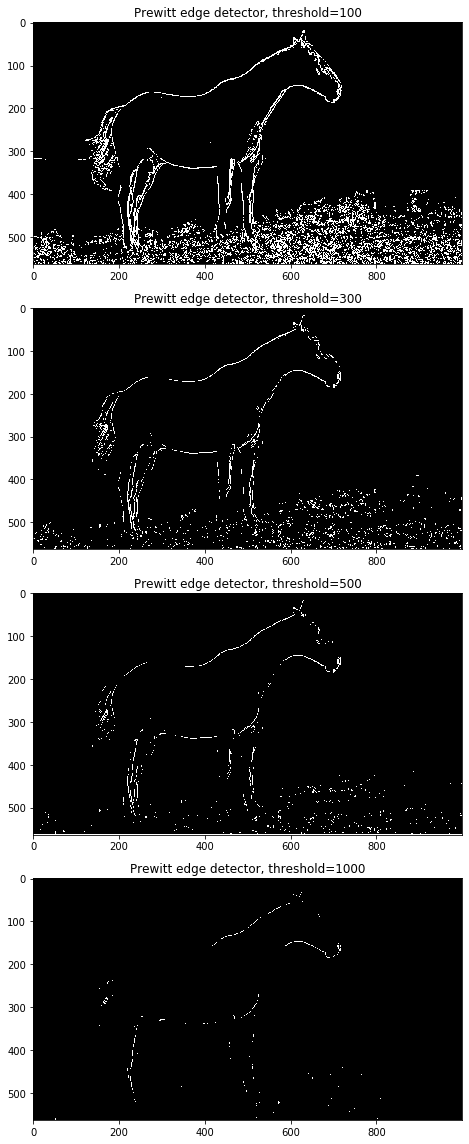

In [187]:
# Prewitt edge detection 

op = np.array([[1, 1, 1],
               [ 0, 0, 0],
               [-1, -1, -1]])/10
x_mask = op.T
y_mask = op
fx = ndi.convolve(img_gray, x_mask, mode='nearest')
fy = ndi.convolve(img_gray, y_mask, mode='nearest')

f = np.square(fx) + np.square(fy)

print(f.max())

plt.figure(figsize=(16,16))
for i, t in enumerate([100, 300, 500, 1000]):
    plt.subplot(4, 1, i+1)
    plt.imshow(f > t, cmap='gray')
    plt.title(f'Prewitt edge detector, threshold={t}')
    
plt.tight_layout()
plt.savefig("prewitt.png")